In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append("../HW6/")
import PLLT_LiftDistribution as PLLT

In [13]:
time = np.linspace(0, 122.73, 10)
print("Times to analyze:", time)
weight = np.array([1220-t*0.44 for t in time])
for i in range(len(weight)):
    print("Weight at {0:.2f} min: {1:.0f} lb".format(time[i], weight[i]))

Times to analyze: [  0.          13.63666667  27.27333333  40.91        54.54666667
  68.18333333  81.82        95.45666667 109.09333333 122.73      ]
Weight at 0.00 min: 1220 lb
Weight at 13.64 min: 1214 lb
Weight at 27.27 min: 1208 lb
Weight at 40.91 min: 1202 lb
Weight at 54.55 min: 1196 lb
Weight at 68.18 min: 1190 lb
Weight at 81.82 min: 1184 lb
Weight at 95.46 min: 1178 lb
Weight at 109.09 min: 1172 lb
Weight at 122.73 min: 1166 lb


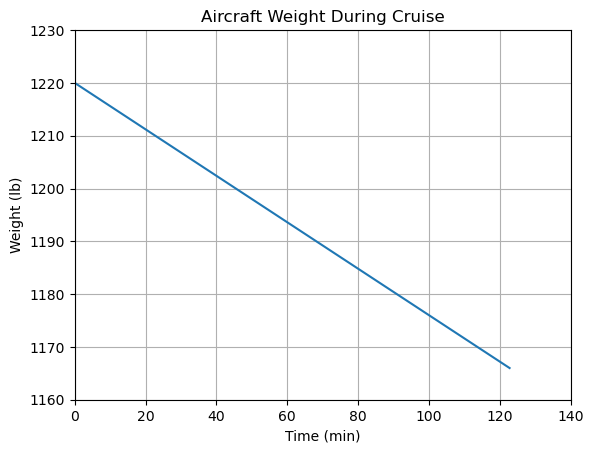

In [10]:
# plot of weight over time
plt.plot(time, weight)
plt.xlabel("Time (min)")
plt.ylabel("Weight (lb)")
plt.ylim([1160, 1230])
plt.xlim([0, 140])
plt.grid()
plt.title("Aircraft Weight During Cruise")
plt.show()